In [1]:
from PIL import Image
import numpy as np

C:\Users\rohan\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\rohan\anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
C:\Users\rohan\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
img_original = Image.open('stones.jpg', 'r') #Open the image

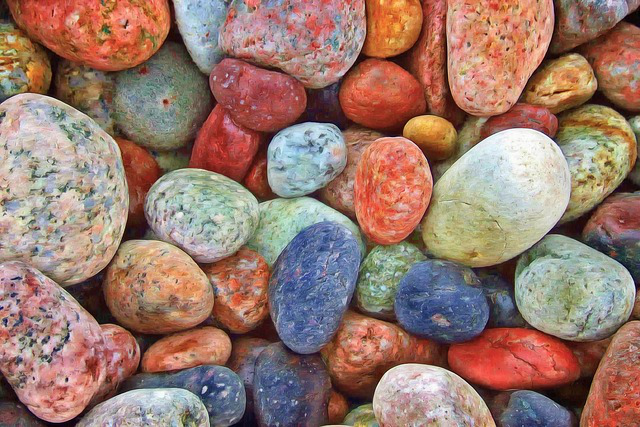

In [3]:
img_original

In [4]:
print(img_original.format, img_original.size, img_original.mode)

JPEG (640, 427) RGB


In [5]:
#Get pixel values in (total_pixels x 3) format with each column corresponding to R,G,B values
pixel_val = np.array(img_original.getdata()) 

In [6]:
pixel_val.shape

(273280, 3)

In [7]:
print(pixel_val)

[[ 33   4   9]
 [ 33  11  13]
 [ 37  23  20]
 ...
 [143  73  63]
 [117  63  51]
 [122  78  65]]


In [8]:
def feature_normalize(pixel_val):
    m, n = pixel_val.shape # m rows, n columns
    mean = np.zeros((1, n)) # To store mean of each column
    std = np.zeros((1, n)) # To store standard deviation of each column
    
    for i in range(n):
        mean[:,i] = np.mean(pixel_val[:,i])
        std[:,i] = np.std(pixel_val[:,i])
    
    X = (pixel_val - mean) / std
    return X, mean, std

In [9]:
X, mean, std = feature_normalize(pixel_val)

In [10]:
print(X)

[[-2.14994921 -2.08864287 -1.72510652]
 [-2.14994921 -1.96318702 -1.65620069]
 [-2.07783673 -1.74811985 -1.5356155 ]
 ...
 [-0.16685603 -0.85200665 -0.7948779 ]
 [-0.63558714 -1.03122929 -1.00159537]
 [-0.54544655 -0.76239533 -0.76042498]]


In [42]:
t=X

In [43]:
t.shape

(273280, 3)

In [44]:
t = np.unique(t, axis = 0)

In [45]:
t.shape

(187741, 3)

In [11]:
def initialize_centroids(X, K):
    X = np.unique(X, axis = 0) # All unique rows in X
    X = np.random.permutation(X) # Permutate X
    centroids = X[0:K,:]
    return centroids

In [12]:
def cluster_assignment(centroids, X, K):
    m, n = X.shape
    temp = np.zeros((m,K)) # To store the distance between each row in X and the centroids
    
    for i in range(K):
        temp[:,i] = np.sum(np.square(X - centroids[i,:]), axis=1) # Compute square distance between X and centroids
        
    idx = temp.argmin(axis=1) # Finds the clusters assigned to each row in X
    idx = np.reshape(idx, (m, 1)) # Reshape into (m x 1) 
    
    return idx

In [13]:
def move_centroids(idx, centroids, X, K):
    m, n = X.shape
    temp = np.ones((m,1)) # To compare with each element of idx
    
    for i in range(K):
        bi = ((idx + 1) == temp * (i+1)) # We get 1's corresponding to cluster 'i+1' in idx
        C = X * bi # All the feature assigned to cluster 'i+1' are obtained
        centroids[i,:] = np.sum(C, axis=0) / np.sum(bi) # Mean of the features assigned to cluster 'i+1'
    
    return centroids

In [15]:
def kmeans(X, K):
    m, n = X.shape
    centroids = initialize_centroids(X, K)
    st = np.zeros((m,1))
    
    while(1):
        idx = cluster_assignment(centroids, X, K)
        centroids = move_centroids(idx, centroids, X, K)
        if np.array_equal(st, idx):
            break
        st = idx
        
    distortion_error = np.sum(np.sum(np.square(X - centroids[idx.reshape(m,).tolist()]), axis = 1)) / m
    
    return [idx, centroids, distortion_error]

In [16]:
li = []
for i in range(10):
    li.append(kmeans(X, 10)) # Run 10 times and store the results in a list

In [17]:
distortion_errors = []
for i in range(len(li)):
    distortion_errors.append(li[i][2]) # Store distortion errors in a list

In [18]:
print(distortion_errors)

[0.2819708666467422, 0.2819708666467422, 0.2829854160159003, 0.2819708666467422, 0.2819708715647583, 0.2829853898641617, 0.2819708666467422, 0.28298334342576265, 0.2819708666467422, 0.28197133360045834]


In [19]:
index_of_min = distortion_errors.index(min(distortion_errors))
idx, centroids = li[index_of_min][0], li[index_of_min][1] # idx and centroids values corresponding to low distortion error

In [20]:
m, n = X.shape
X_map = centroids[idx.reshape(m,).tolist()] # Map each feature to it's cluster centroid

In [21]:
pixel_val_compressed = (X_map * std) + mean # Reconstruct pixel values
pixel_val_compressed = pixel_val_compressed.astype(int)
pixel_val_compressed = tuple(map(tuple, pixel_val_compressed))

In [22]:
img_compressed = Image.new('RGB', (img_original.size)) 
img_compressed.putdata(pixel_val_compressed) # Convert to image

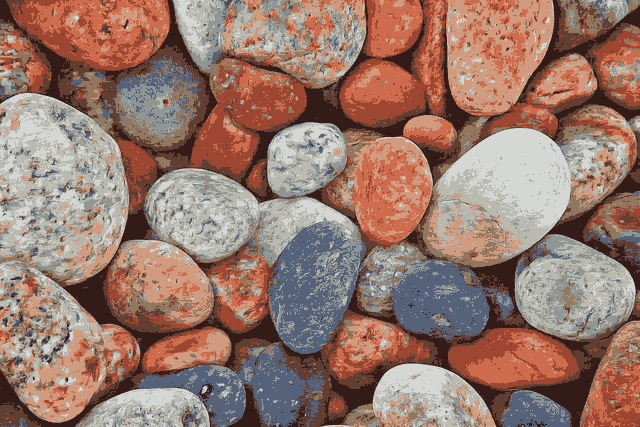

In [23]:
img_compressed


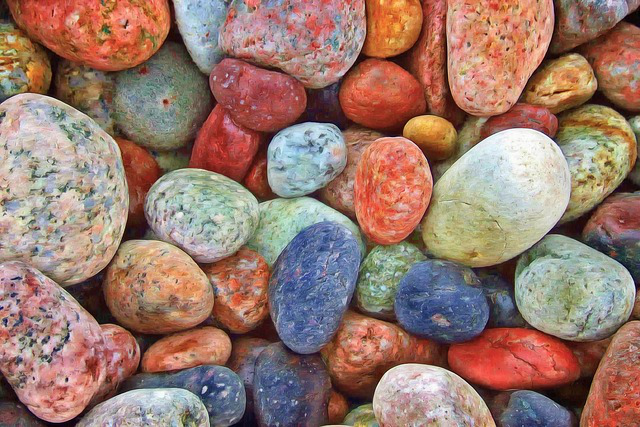

In [24]:
img_original

In [25]:
img_compressed.save("stones_compressed(K=10).jpg")

In [26]:
li = []
for i in range(10):
    li.append(kmeans(X, 20)) # Run 20 times and store the results in a list

distortion_errors = []
for i in range(len(li)):
    distortion_errors.append(li[i][2]) # Store distortion errors in a list


index_of_min = distortion_errors.index(min(distortion_errors))
idx, centroids = li[index_of_min][0], li[index_of_min][1] # idx and centroids values corresponding to low distortion error

m, n = X.shape
X_map = centroids[idx.reshape(m,).tolist()] # Map each feature to it's cluster centroid

pixel_val_compressed = (X_map * std) + mean # Reconstruct pixel values
pixel_val_compressed = pixel_val_compressed.astype(int)
pixel_val_compressed = tuple(map(tuple, pixel_val_compressed))

img_compressed = Image.new('RGB', (img_original.size)) 
img_compressed.putdata(pixel_val_compressed) # Convert to image

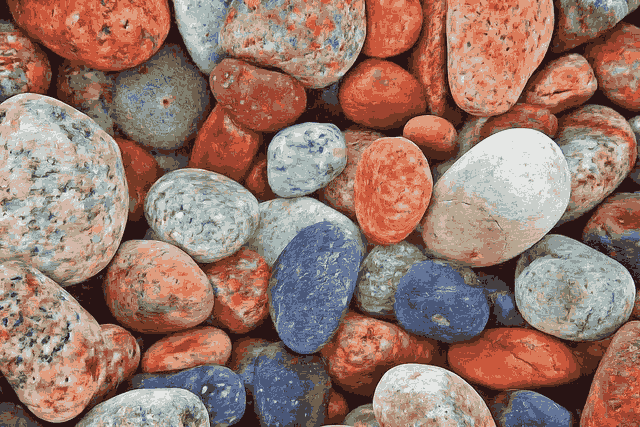

In [27]:
img_compressed

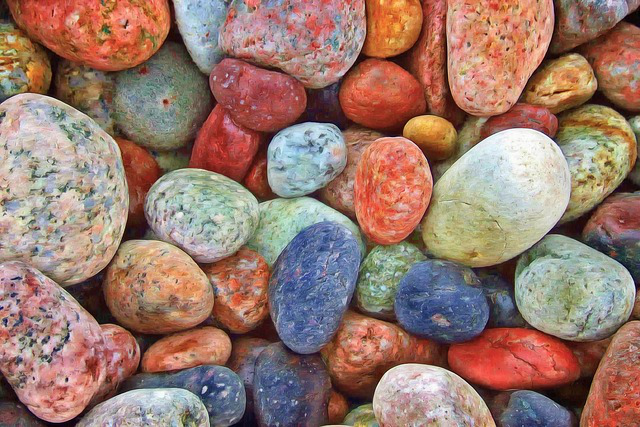

In [28]:
img_original

In [29]:
img_compressed.save("stones_compressed(K=20).jpg")

In [30]:
li = []
for i in range(50):
    li.append(kmeans(X, 5)) # Run 50 times and store the results in a list

distortion_errors = []
for i in range(len(li)):
    distortion_errors.append(li[i][2]) # Store distortion errors in a list


index_of_min = distortion_errors.index(min(distortion_errors))
idx, centroids = li[index_of_min][0], li[index_of_min][1] # idx and centroids values corresponding to low distortion error

m, n = X.shape
X_map = centroids[idx.reshape(m,).tolist()] # Map each feature to it's cluster centroid

pixel_val_compressed = (X_map * std) + mean # Reconstruct pixel values
pixel_val_compressed = pixel_val_compressed.astype(int)
pixel_val_compressed = tuple(map(tuple, pixel_val_compressed))

img_compressed = Image.new('RGB', (img_original.size)) 
img_compressed.putdata(pixel_val_compressed) # Convert to image

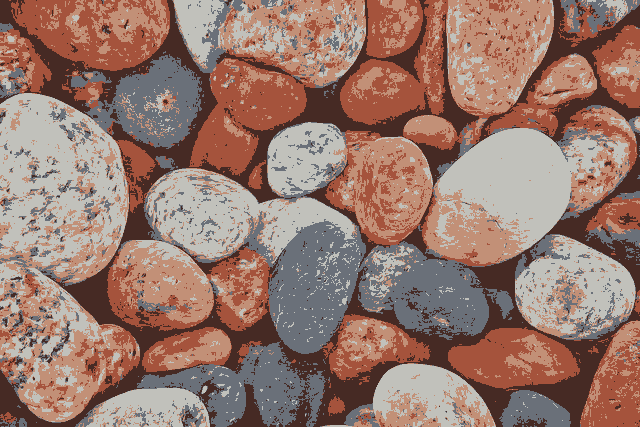

In [31]:
img_compressed

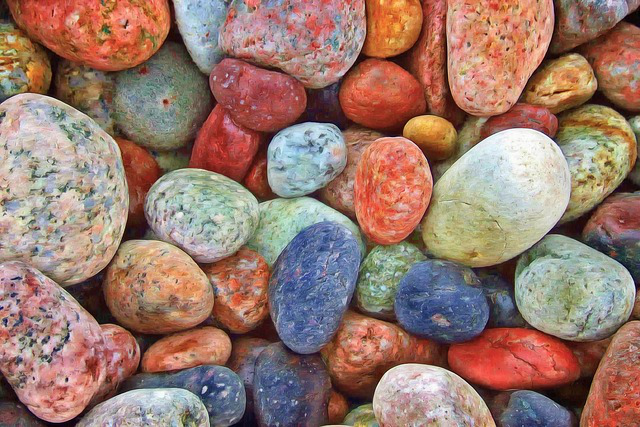

In [32]:
img_original

In [33]:
img_compressed.save("stones_compressed(K=5).jpg")

In [34]:
li = []
for i in range(100):
    li.append(kmeans(X, 2)) # Run 100 times and store the results in a list

distortion_errors = []
for i in range(len(li)):
    distortion_errors.append(li[i][2]) # Store distortion errors in a list


index_of_min = distortion_errors.index(min(distortion_errors))
idx, centroids = li[index_of_min][0], li[index_of_min][1] # idx and centroids values corresponding to low distortion error

m, n = X.shape
X_map = centroids[idx.reshape(m,).tolist()] # Map each feature to it's cluster centroid

pixel_val_compressed = (X_map * std) + mean # Reconstruct pixel values
pixel_val_compressed = pixel_val_compressed.astype(int)
pixel_val_compressed = tuple(map(tuple, pixel_val_compressed))

img_compressed = Image.new('RGB', (img_original.size)) 
img_compressed.putdata(pixel_val_compressed) # Convert to image

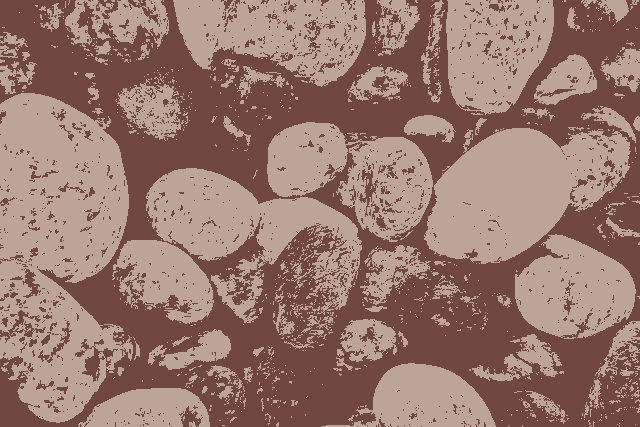

In [35]:
img_compressed

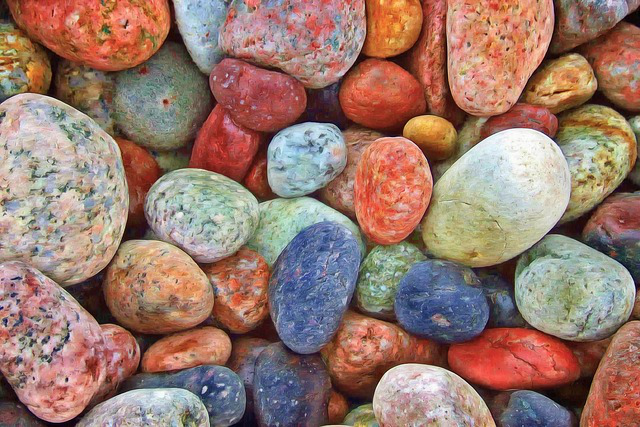

In [36]:
img_original

In [37]:
img_compressed.save("stones_compressed(K=2).jpg")

In [38]:
li = []
for i in range(1):
    li.append(kmeans(X, 50)) # Run 50 times and store the results in a list

distortion_errors = []
for i in range(len(li)):
    distortion_errors.append(li[i][2]) # Store distortion errors in a list


index_of_min = distortion_errors.index(min(distortion_errors))
idx, centroids = li[index_of_min][0], li[index_of_min][1] # idx and centroids values corresponding to low distortion error

m, n = X.shape
X_map = centroids[idx.reshape(m,).tolist()] # Map each feature to it's cluster centroid

pixel_val_compressed = (X_map * std) + mean # Reconstruct pixel values
pixel_val_compressed = pixel_val_compressed.astype(int)
pixel_val_compressed = tuple(map(tuple, pixel_val_compressed))

img_compressed = Image.new('RGB', (img_original.size)) 
img_compressed.putdata(pixel_val_compressed) # Convert to image

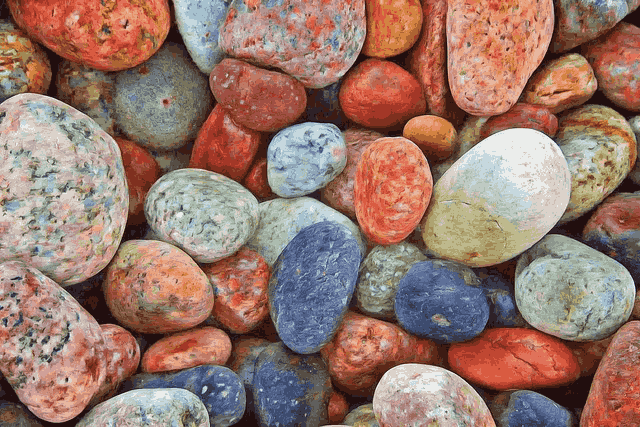

In [39]:
img_compressed

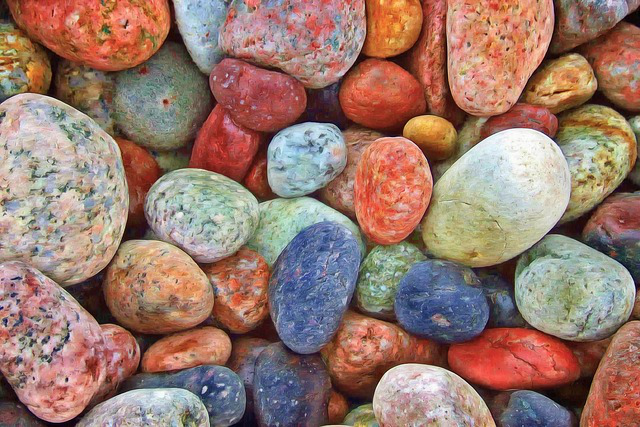

In [40]:
img_original

In [41]:
img_compressed.save("stones_compressed(K=50).jpg")

In [46]:
li = []
for i in range(1):
    li.append(kmeans(X, 100)) 

distortion_errors = []
for i in range(len(li)):
    distortion_errors.append(li[i][2]) # Store distortion errors in a list


index_of_min = distortion_errors.index(min(distortion_errors))
idx, centroids = li[index_of_min][0], li[index_of_min][1] # idx and centroids values corresponding to low distortion error

m, n = X.shape
X_map = centroids[idx.reshape(m,).tolist()] # Map each feature to it's cluster centroid

pixel_val_compressed = (X_map * std) + mean # Reconstruct pixel values
pixel_val_compressed = pixel_val_compressed.astype(int)
pixel_val_compressed = tuple(map(tuple, pixel_val_compressed))

img_compressed = Image.new('RGB', (img_original.size)) 
img_compressed.putdata(pixel_val_compressed) # Convert to image

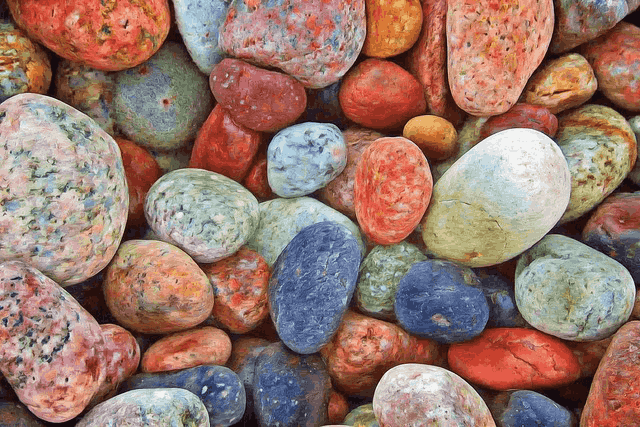

In [47]:
img_compressed

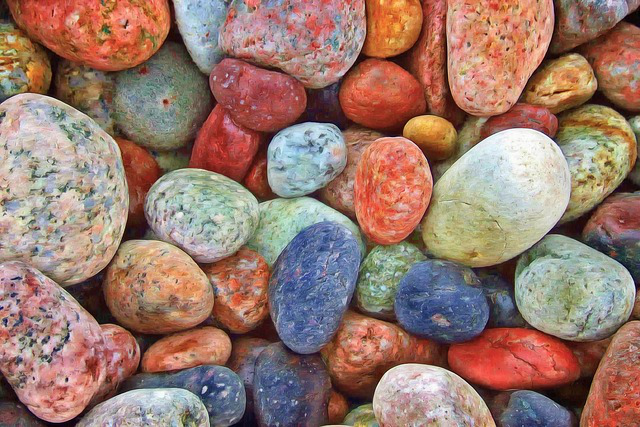

In [48]:
img_original

In [49]:
img_compressed.save("stones_compressed(K=100).jpg")

In [52]:
from timeit import default_timer as timer

In [53]:
start = timer()

kmeans(X,2)

end = timer()
print(end - start)

0.8614349999998012


In [54]:
start = timer()

kmeans(X,5)

end = timer()
print(end - start)

5.958215100000416


In [55]:
start = timer()

kmeans(X,10)

end = timer()
print(end - start)

21.751602499999535


In [56]:
start = timer()

kmeans(X,20)

end = timer()
print(end - start)

69.41246020000017


In [57]:
start = timer()

kmeans(X,50)

end = timer()
print(end - start)

289.65958500000033


In [58]:
start = timer()

kmeans(X,100)

end = timer()
print(end - start)

764.829874


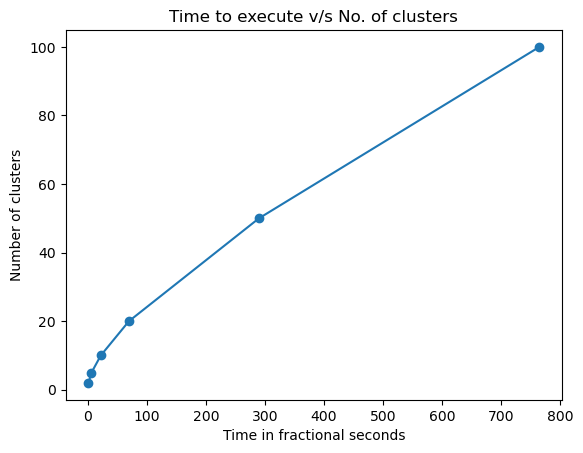

In [68]:
import matplotlib.pyplot as plt

x=[0.8614349999998012,5.958215100000416,21.751602499999535,69.41246020000017, 289.65958500000033, 764.829874]
y=[2, 5, 10, 20, 50, 100]
plt.plot(x,y,marker='o')
plt.xlabel('Time in fractional seconds')
plt.ylabel('Number of clusters')
plt.title("Time to execute v/s No. of clusters")
plt.show()

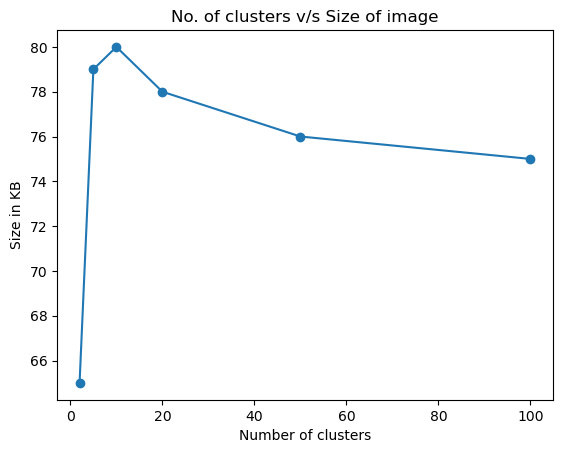

In [67]:
y=[65,79,80,78, 76, 75]
x=[2, 5, 10, 20, 50, 100]
plt.plot(x,y,marker='o')
plt.ylabel('Size in KB')
plt.xlabel('Number of clusters')
plt.title("No. of clusters v/s Size of image")
plt.show()